In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# ![](https://ga-dash.s3.amazonaws.com/production/assets/logo-9f88ae6c9c3871690e33280fcf557f33.png) Missing Data

Week 4 | Day 4

### LEARNING OBJECTIVES
*After this lesson, you will be able to:*
- Identify missing data
- Understand a few techniques to deal with missing data
- Outline the limitations of these techniques

## What is missing data?

- missing data point for a given variable
- more high level, it's missing information


### Which of these are examples of missing data?

- no record of a person's data of birth
- no answer to a question because the survey-giver forgot to ask it
- no answer to a question because the survey-taker refused to answer it
- income level encoded as >$100k
- effect of a medical treatment for the placebo group

## They are all types of missing data!

And they all can have an effect on the conclusions we can draw

## Why do we care about missing data?

- we have lost information (less information to work with and learn from)
- we might bias our findings if we don't "handle" it properly (selection bias)


## An example.... (completely fictitious, of course...)

Exit polls!





**Hypothetical Situation:** 

Country A has been a member of a large international economic union for 40+ years.  There is some unhappiness about the arragement, so a plebiscite is held to determine future membership.

Leading up to the vote, it seems that the majority will vote to remain in the union.  Most newspapers / media outlets are in favour of staying, and there is some suggestion that a vote to leave is a product of ignorance (in other words, it's decidedly "uncool" to vote to leave).

On the day of the vote, pollsters stand outside voting stations and ask people how they voted. 

Some people refuse to answer.

The pollsters collect the following data:

- Remain: 57
- Leave: 43
- No Answer: 26

The pollsters need to consider what to do with the missing values.  


They decide to just disregard the "No Answers" 

So they conclude:

*57% of people voted to remain!*


Any concerns with this?

## What assumption did they make?

By ignoring the "No Answers" the pollsters were assuming that of the people who didn't answer, 57% voted to remain and 43% voted to leave.

Is this a reasonable assumption?

## A better assumption?

What if they assumed that people who didn't asnwer were equally split between remain and leave.  So the numbers should have looked like this:

- Remain: 70
- Leave: 56

So 56% of people voted to stay!

Is this likely?

Actually, people who voted to leave were much more likely to decline to answer (since it was believed to be the less popular choice).  So the data actually should have looked like this:

- Remain: 62
- Leave: 64

50.7% of people voted to leave

So what you do with missing data can have a significant impact on your findings.

## How do we know we have missing data?

Ok, so we know we need to think about what to do with missing data.  But how do we know that we have it?

Broadly speaking, by exploring the data!



## What does it look like?

It can be hard to find.  Some datasets have missing value sentinels ("*", -999, -1, "n/a").

You can find these by using things like value_counts(), or by reading the notes that came with the data source (sometimes the source will tell you how missing values are encoded)



## Special missing value markers

Python recognizes None and np.nan as missing values, and allows you to perform specific tasks on them

In [197]:
a =[1,2,3,4,5,np.nan]
b = [None, "a", "b", "c", np.nan, "d"]
df=pd.DataFrame()
df['first'] = a
df['second'] = b
df

first second
0    1.0   None
1    2.0      a
2    3.0      b
3    4.0      c
4    5.0    NaN
5    NaN      d

In [198]:
# find the number of missing values in each column
df.isnull().sum()

first     1
second    2
dtype: int64

In [199]:
# find the number of missing values in each row
df.isnull().sum(axis=1)

0    1
1    0
2    0
3    0
4    1
5    1
dtype: int64

## What can we do to fix the missingness?

So we know how to find missing data, and we know we need to do something to it, but what can we do?

The best (but least feasible) approach is to go out and get the missing values!

But this might be too expensive, too hard, or just impossible

## We can drop missing data

But as we saw earlier, this might have some unintended consequences.  We lose some statistical power, and unless the data are missing completely at random (we'll touch on this later), the findings will be biased.

But maybe we just want to build a cheap model, and don't believe excluding the missing data will bias findings meaningfully.  Or maybe there aren't that many missing values, and the effect is de minimis

In [200]:
df2 = df.dropna()
df2

first second
1    2.0      a
2    3.0      b
3    4.0      c

## We can impute the missing values

We can fill the missing values in with our best estimate of what the value should be.  How could we do this?

To keep it simple, we could use the mean, median, mode of the non-missing data

In [220]:
# generate some data with missingness
keys= ['a', 'b', 'c', 'd']
temp_dict = {}
for key in keys:
    temp_dict[key] = np.random.randn(100)*25+100
df = pd.DataFrame(temp_dict)
for i in range(20):
    x = np.random.randint(4)
    y = np.random.randint(100)
    df.iloc[y,x] = np.nan

In [221]:
df.head()

a          b           c           d
0  116.795231  79.821561   65.205099   87.718436
1  107.037741  96.360369   72.124985   64.968264
2         NaN  67.520001  101.587350  120.183513
3   99.873116  44.045472  102.794585   80.539873
4   69.793821  75.139646   50.050609  108.102391

In [202]:
df.isnull().sum()

a    4
b    4
c    5
d    7
dtype: int64

## Impute with Mean

In [203]:
from sklearn.preprocessing import Imputer
imp_mean = Imputer(strategy='mean', axis=0)
df_mean = imp_mean.fit_transform(df)
df_mean = pd.DataFrame(df_mean, columns=df.columns)
df_mean.isnull().sum()

a    0
b    0
c    0
d    0
dtype: int64

We can use similar methodology to impute with the median or the mode.

[docs](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Imputer.html#sklearn.preprocessing.Imputer)


What are the concerns with this type of imputation?

### Mean is unchanged

In [204]:
pd.DataFrame(zip(df.mean(), df_mean.mean()), columns=['original', 'imputed'])

original     imputed
0  102.303281  102.303281
1   97.227687   97.227687
2  101.723029  101.723029
3   96.243045   96.243045

## But variance is smaller

In [205]:
pd.DataFrame(zip(df.var(), df_mean.var()), columns=['original', 'imputed'])


original     imputed
0  527.050690  505.755712
1  660.432900  633.748742
2  573.332988  544.376776
3  635.450183  590.519362

Also, what are we assuming about the missing data points? 

Can we think of a way to improve on this?

We can use other information we have about the record to inform our imputation.

## Hot Deck Imputation

This is a fairly commonly used technique, but there is no standard implementation in python.

Essentially, you find the most similar record that has no missing value, and use that to impute.

<img src="./assets/hot-deck.png" width="300" />

> Check: what might be the concerns with this?

## Now that we know how to build models, we could impute using regression

In [206]:
keys= ['a', 'b', 'c', 'd']
temp_dict = {}
for key in keys:
    temp_dict[key] = np.random.randn(100)*25+100
df = pd.DataFrame(temp_dict)
errs = [np.random.randn(1)[0]*25 for i in range(100)]
df['d'] = 2*df['c']+errs

for i in range(20):
    y = np.random.randint(100)
    df.iloc[y,3] = np.nan
df.isnull().sum()

a     0
b     0
c     0
d    17
dtype: int64

We only have missingness on d.  And we believe that d might be correlated with other variables in the data set.

In [207]:
df.corr()

a         b         c         d
a  1.000000 -0.001478  0.076715  0.041537
b -0.001478  1.000000  0.080055  0.158752
c  0.076715  0.080055  1.000000  0.915284
d  0.041537  0.158752  0.915284  1.000000

How could we use regression to impute the missing d values?

In [208]:
# create a subset of the data with no missing values
sub = df.dropna()
from sklearn.linear_model import LinearRegression
from math import isnan
# fit a linear regression on the subset
lr = LinearRegression()
lr.fit(sub[['a', 'b', 'c']], sub['d'])
imputed = lr.predict(df[['a', 'b', 'c']])
# if value in column d is missing, replace it with the imputed value
df2 = df.copy()
temp = df2['d']
df2['d'] = [j if isnan(j)==False else imputed[i] for i,j in \
            enumerate(temp)]



In [210]:
pd.DataFrame(zip(df.var(), df2.var()), columns = ['original', 'imputed'])

original      imputed
0   458.268194   458.268194
1   546.105340   546.105340
2   728.724916   728.724916
3  3910.173062  3636.790860

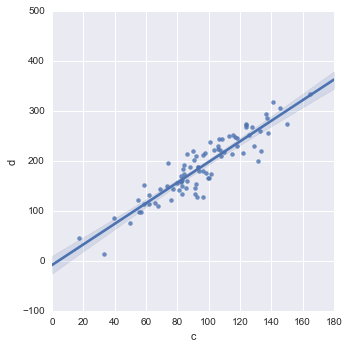

In [219]:
import seaborn as sns
sns.lmplot(x='c', y='d', data=df, x_ci=None)

## Multiple Imputation Chained Equations (MICE) - The As-Of-Now Gold Standard!

- incorporates the uncertainty component
- involves imputing values multiple times, and pooling the results in your model
- may not be feasible, and is also poorly implemented in python (for now)

Side note: beware googling *python + mice*

[more info on MICE](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3074241/)


## Things to consider when deciding how to treat missing data

- how much is missing?
    - if de minimis, course of action may be different!
- time / cost / technology considerations
- why is it missing?
    - this may inform which imputation methods you choose  


## Types of missingess

- Missing Completely at Random (MCAR)
- Missing at Random (MAR)
- Not Missing at Random

## MCAR

Data is missing completely at random.  

E.g., a survey giver randomly selects a subset of questions to ask survey-takers.  The fact that the data are missing is totally random.

In this case, simply deleting the records with missing data does not bias findings.  But you may still want to impute values to increase the number of complete records to analyze.

**BUT:** this is almost never the case

## MAR

Data is missing *conditionally* at random.

E.g., we ask British and American people to tell us how happy they feel on a scale on 1-10.  Some people refuse to answer.  British people (because they are more reserved) and older people (because they are old-fashioned) are more likely to refuse.  We fully observe nationality and age.

So, the fact that the data are missing depends on things we can observe!  Multiple Imputation using the observed features is effective!

**BUT:** this is generally hard to prove.  


## MNAR

Data are not missing at random.  

E.g., we ask people to self-report their happiness.  People who are unhappy are less likely to agree to answer.

So, the fact that the data are missing depends on things we cannot or have not observed.

This is a difficult situation.  And theoretically, there is no way to "correctly" impute the missing data.

**And**: this quite possibly is the most common situation

## Final Thoughts / Best Practices

Missing data is complicated!  It is rarely possibly to do the "right" thing.  But being aware of the issues may allow you to make informed decisions.  Or at least, you may have a better sense of the limitations of your analyses.

- it is rarely a bad idea to impute
- you may often choose a "bad" methodolgy because it is "good enough".  That is ok.